<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_DL_lab_9_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
weather_data=pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


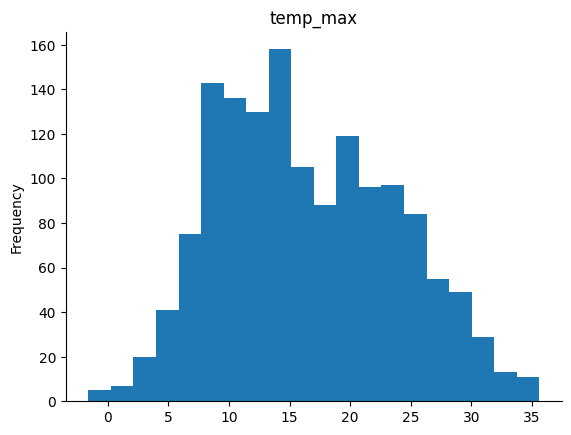

In [22]:
# @title temp_max

from matplotlib import pyplot as plt
weather_data['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

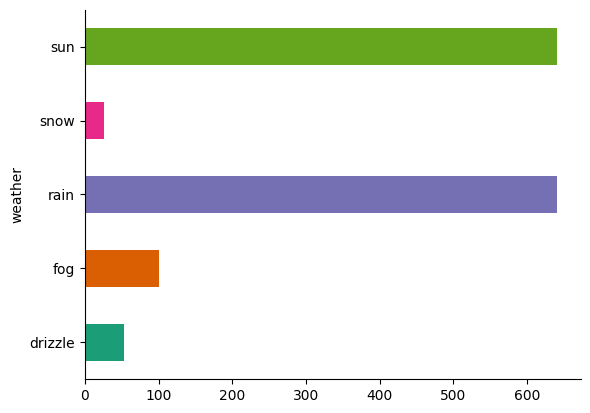

In [23]:
# @title weather

from matplotlib import pyplot as plt
import seaborn as sns
weather_data.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
weather_data.shape

(1461, 6)

In [25]:
weather_data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [26]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [27]:
weather_count=weather_data['weather'].value_counts()
weather_count

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [28]:
temp_count=weather_data['temp_max'].value_counts()
temp_count

temp_max
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: count, Length: 67, dtype: int64

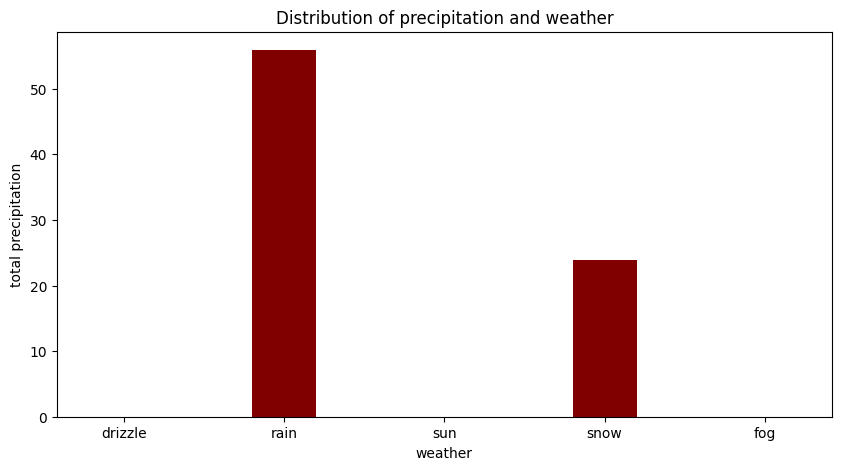

In [29]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(weather_data['weather'],weather_data['precipitation'],color ='maroon', width = 0.4)

plt.xlabel("weather")
plt.ylabel("total precipitation")
plt.title("Distribution of precipitation and weather")
plt.show()

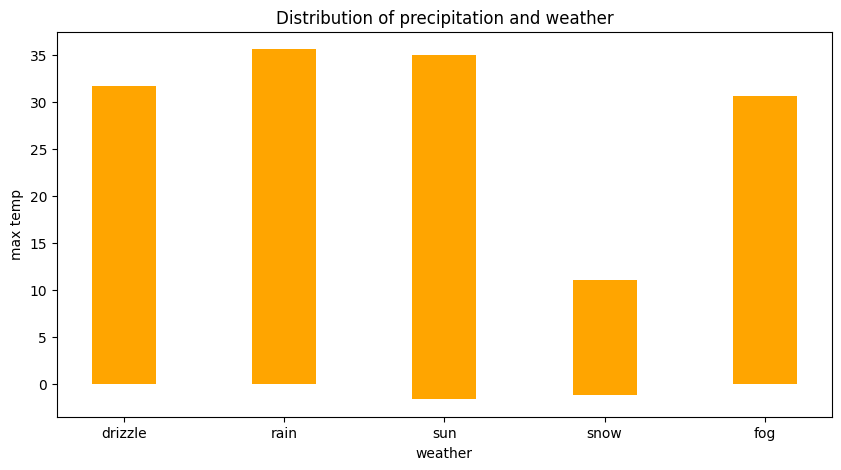

In [30]:

#distribution of temp_max and weather
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(weather_data['weather'],weather_data['temp_max'],color ='orange', width = 0.4)

plt.xlabel("weather")
plt.ylabel("max temp")
plt.title("Distribution of precipitation and weather")
plt.show()

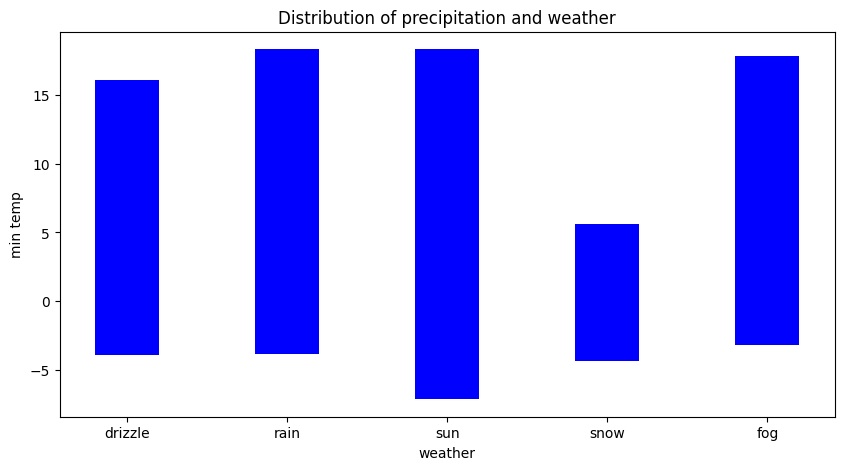

In [31]:

#distribution of temp_max and weather
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(weather_data['weather'],weather_data['temp_min'],color ='blue', width = 0.4)

plt.xlabel("weather")
plt.ylabel("min temp")
plt.title("Distribution of precipitation and weather")
plt.show()

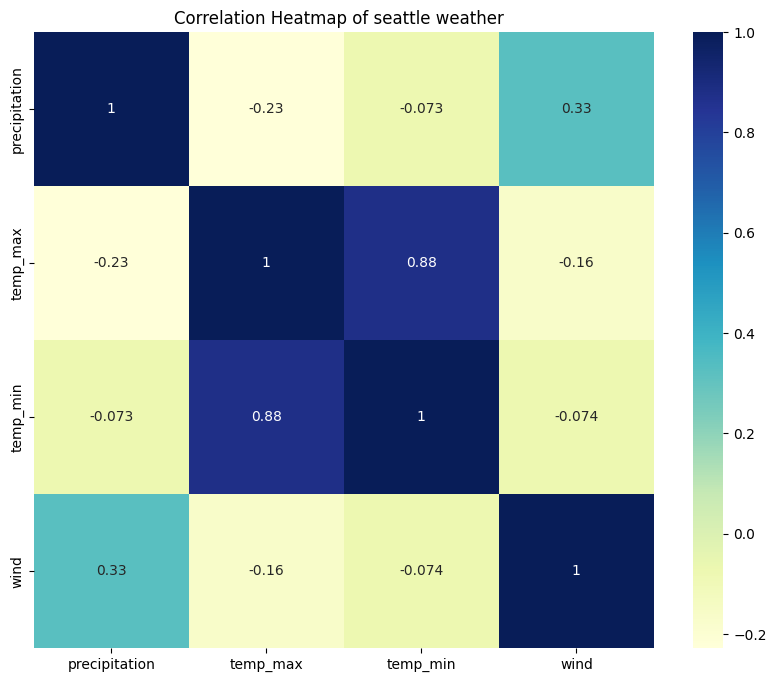

In [32]:
plt.figure(figsize=(10, 8))
sn.heatmap(weather_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of seattle weather  ')
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential


# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Set the 'date' column as the index
weather_data.set_index('date', inplace=True)

# Resample the data to daily frequency and fill missing values
data = weather_data[['temp_max']]
data = data.resample('D').mean().fillna(method='ffill')

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [34]:
lookback = 1
X,y = [], []

for i in range(len(data_scaled) - lookback):
    X.append(data_scaled[i:i+lookback])
    y.append(data_scaled[i+lookback])

X, y = np.array(X), np.array(y)

# Split data into train and test sets
split = int(0.8 * len(data_scaled))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Epoch 1/25
37/37 [==============================] - 3s 3ms/step - loss: 0.1908
Epoch 2/25
37/37 [==============================] - 0s 3ms/step - loss: 0.0707
Epoch 3/25
37/37 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 4/25
37/37 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 5/25
37/37 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 6/25
37/37 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 7/25
37/37 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 8/25
37/37 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 9/25
37/37 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 10/25
37/37 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 11/25
37/37 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 12/25
37/37 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 13/25
37/37 [==============================

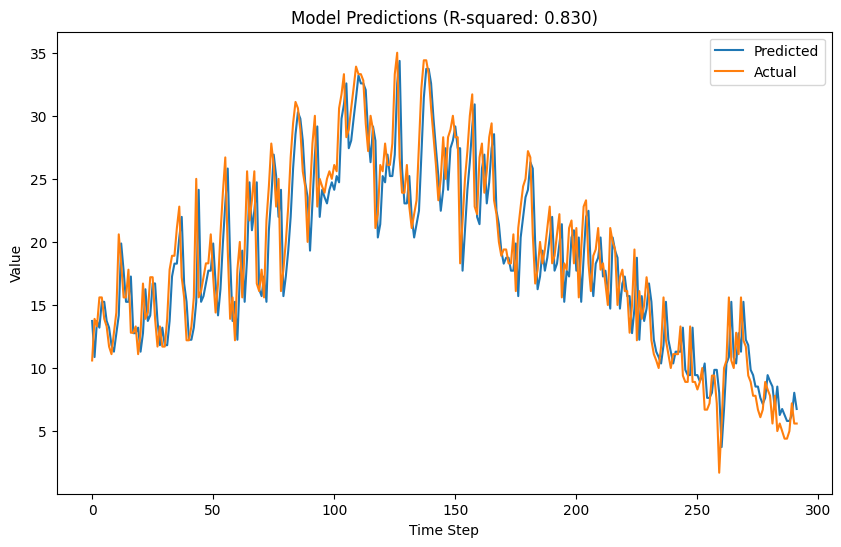

In [36]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Create an LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Assess the R-squared (coefficient of determination) for model evaluation
r_squared = r2_score(y_test_inv, predictions_inv)
print(f'R-squared: {r_squared:.4f}')

# Visualize the predictions and actual values along with R-squared
plt.figure(figsize=(10, 6))
plt.plot(predictions_inv, label='Predicted')
plt.plot(y_test_inv, label='Actual')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Model Predictions (R-squared: {r_squared:.3f})')
plt.legend()
plt.show()
